### Setup

Before running this journal, first...

1. (Windows) Install Anaconda Navigator: https://www.anaconda.com/docs/tools/anaconda-navigator/main (Linux) Install jupyter-lab
2. (Windows only) Install packages within the base environment in Anaconda Navigator: numpy, pandas, plotly, jupyter-dash
3. (Windows only) Install brunnhilde (```pip install brunnhilde```) in an Anaconda Command Prompt
4. (Linux only) Install numpy, pandas, plotly, jupyter-dash, for Python via package manager (Conda is probably better)
5. (Linux/Windows) Download Siegfried and bulk_extractor binaries; place in PATH
6. (Linux/Windows) Download the 10 Govdocs-threads folders and extract to the same directory; place in ../data/ 

In [18]:
import os, datetime, csv, mimetypes, humanize
from os.path import join, getsize, getmtime
import pandas as pd
import numpy as np

accession_dir = "../data/Govdocs1-threads" # modify as needed

# function to identify file extension
def get_extension(name):
    result = None
    i = name.rfind('.')
    if i > 0:
        result = name[i+1:]
    return result

file_count = 0
with open('inventory.csv', 'w', newline='') as csvfile:
    mywriter = csv.writer(csvfile, quoting=csv.QUOTE_MINIMAL)
    mywriter.writerow(['name', 'path', 'bytes', 'bytes_humanized', 'modified', 'mod_year','extension', 'category', 'mimetype', 'folder1', 'folder2'])
    
    # This is where the "crawl" of files starts, using the Python os.walk() function
    for folder, subfolders, files in os.walk(accession_dir):
        # Walk gives us the folder name (folder), subfolders list, and file names list for each folder in our accession.
        for name in files:
            file_count = file_count + 1  # Count this file
            fullpath = join(folder, name)  # The full path to a file is made by joining file name and folder name.
            
            mod_dt = datetime.datetime.fromtimestamp(getmtime(fullpath))  # modified timestamp is converted into a Python date
            
            (mime, encoding) = mimetypes.guess_type(fullpath)  # Python mimetypes module will guess a mimetype
            if mime is None:
                mime = "application/octet-stream"  # This is a generic "stream of bytes" mimetype
            category = mime.split('/')[0]  # The high-level mimetype is the half before the slash '/', such as 'text' or 'image'
            
            folder_path = folder[len(accession_dir):]  # We trim off the accession folder path to get just the path within the accession.
            path_segments = folder_path.split('/')
            folder1 = path_segments[0]
            folder2 = path_segments[1] if len(path_segments) > 1 else '.'
            
            mywriter.writerow([name, folder_path,  # This writes a line to the CSV file 
                               getsize(fullpath),
                               humanize.naturalsize(getsize(fullpath)), # writes human readable size
                               mod_dt.isoformat(),
                               mod_dt.year,
                               get_extension(name),
                               category,
                               mime,
                               folder1,
                               folder2])
print("Inventory done: "+accession_dir)
print("Inventory file count:"+str(file_count))

Inventory done: ../data/Govdocs1-threads
Inventory file count:9879


In [19]:
inventory = 'inventory.csv'
df = pd.read_csv(inventory)

print("Inventory read from: "+ os.getcwd()+"\\"+inventory+"\n")
display(df.head(3))
print('dimensions: '+ str(df.shape)+"\n")

Inventory read from: C:\Users\me\code\547-final-project\Digital-Preservation\inventory.csv



,name,path,bytes,bytes_humanized,modified,mod_year,extension,category,mimetype,folder1,folder2
0,000233.gif,\000,120908,120.9 kB,2002-07-03T10:34:08,2002,gif,image,image/gif,\000,.
1,000394.xls,\000,21504,21.5 kB,2004-12-12T20:19:16,2004,xls,application,application/vnd.ms-excel,\000,.
2,000578.pdf,\000,351558,351.6 kB,2008-10-14T14:55:38,2008,pdf,application,application/pdf,\000,.


dimensions: (9879, 11)



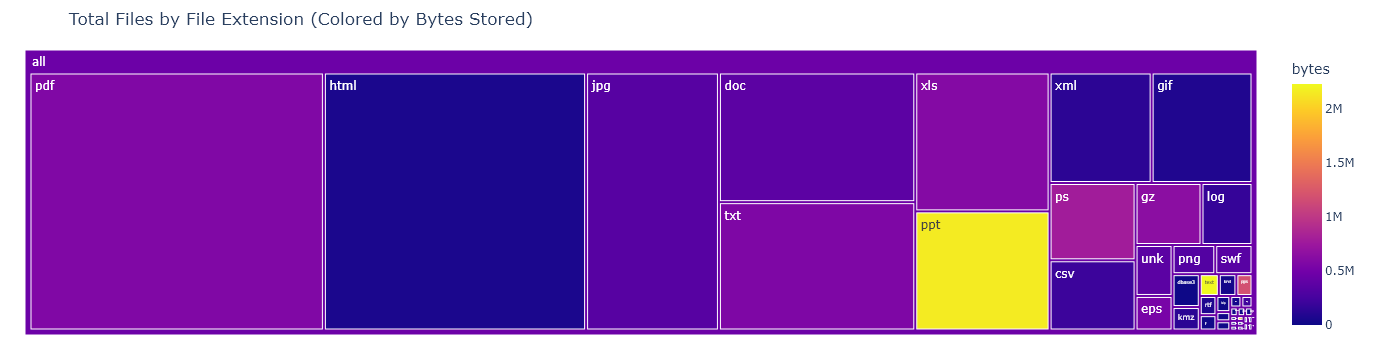

In [17]:
import plotly.express as px

fig = px.treemap(df,
                 title="Total Files by File Extension (Colored by Average Bytes Stored)",
                 path=[px.Constant("all"), 'extension'], 
                 color='bytes',
                 height=500
                )
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

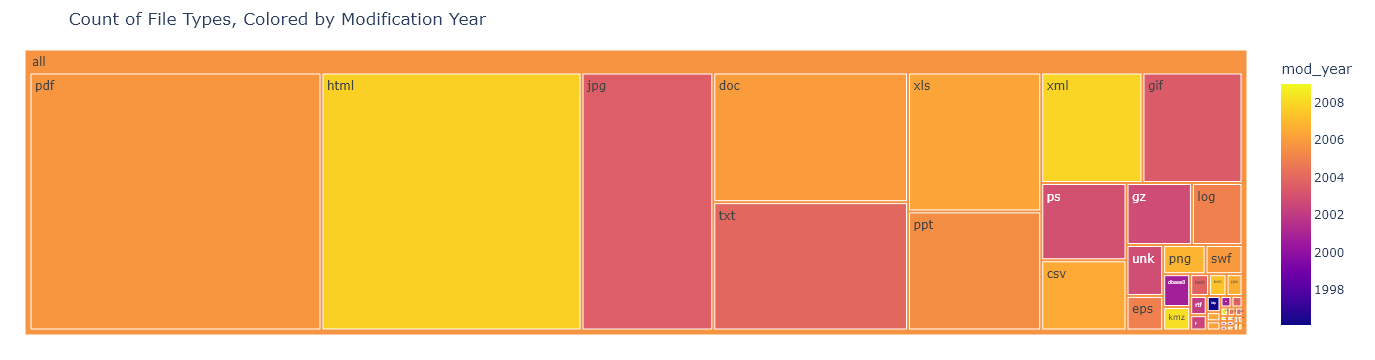

In [16]:
import plotly.express as px

fig = px.treemap(df,title="Count of File Types, Colored by Modification Year",path=[px.Constant("all"), 'extension'], color='mod_year',height=600
                )
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [7]:
#import plotly.express as px
#fig = px.histogram(df, x="extension", y="bytes", color="category", title="Average Size of 25 Most Common File Extensions, Colored by MIME category", hover_data=df.columns, histfunc='avg',height=500)
#fig.update_xaxes(categoryorder='sum ascending')
#fig.update_xaxes(range=(16.5, 42))
#fig.show()

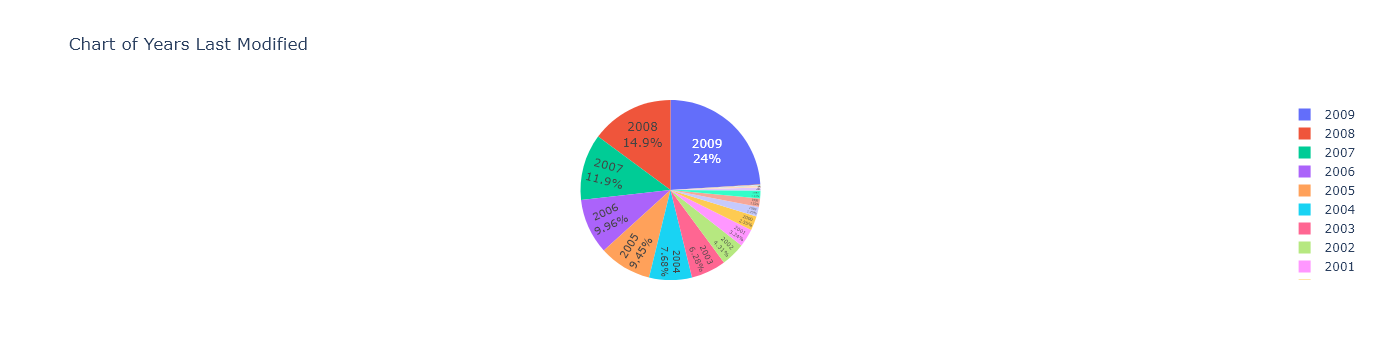

In [15]:
import plotly.express as px
fig = px.pie(df, title="Chart of Years Last Modified", names="mod_year",  height=500)
fig.update_traces(textposition='inside', textinfo='percent+label')
#fig.update_layout(bargap=0.2)
#fig.update_xaxes(range=(1979, 2010))
fig.show()

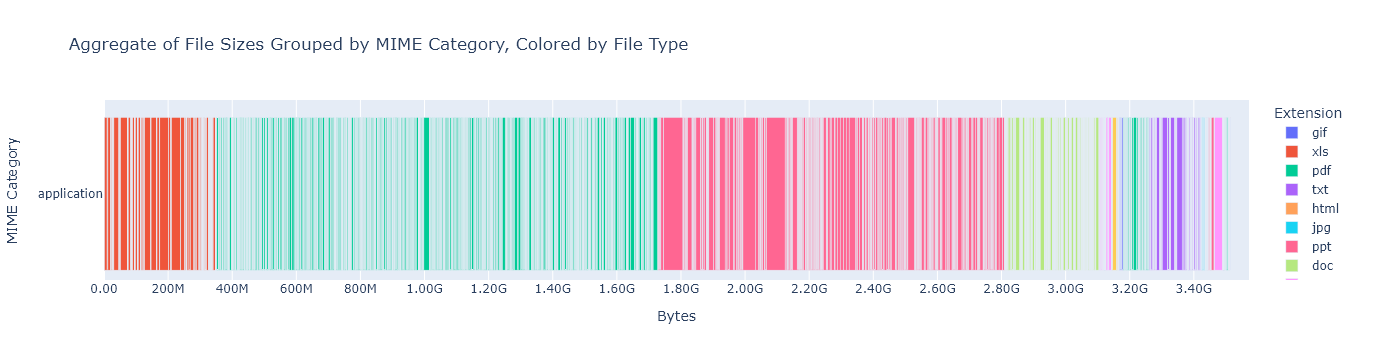

In [20]:
import plotly.express as px
fig = px.bar(df, x='bytes', y='category', color='extension',height=600, orientation='h', hover_data="name", title="Aggregate of File Sizes Grouped by MIME Category, Colored by File Type", labels=dict(bytes="Bytes", category="MIME Category", extension="Extension"))
fig.update_yaxes(categoryorder='total descending')
fig.update_xaxes(categoryorder='total ascending', nticks=30)
fig.update_layout(
    xaxis_tickformatstops = [dict(dtickrange=[None, None], value=".3s")]
)
fig.show()